In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fraud_detection_dataset.csv")
print(df.head())



   transaction_id  amount transaction_type  account_age_days  \
0               1   93.85            debit               328   
1               2  602.02         transfer              3205   
2               3  263.35         purchase              1405   
3               4  182.59         cash_out              1384   
4               5   33.92         cash_out              1356   

   is_foreign_transaction  is_high_risk_country  daily_transaction_count  \
0                       0                     0                        4   
1                       0                     0                        2   
2                       0                     0                        1   
3                       1                     0                        5   
4                       0                     0                        4   

   avg_transaction_amount  is_fraud  
0                   97.95         0  
1                  152.65         0  
2                  174.64         0  
3     

In [ ]:
# Check for missing values
df.isnull().sum()


,0
transaction_id,0
amount,0
transaction_type,0
account_age_days,0
is_foreign_transaction,0
is_high_risk_country,0
daily_transaction_count,0
avg_transaction_amount,0
is_fraud,0


In [ ]:
#2 data cleaning
# Check for missing values
print(df.isnull().sum())

transaction_id             0
amount                     0
transaction_type           0
account_age_days           0
is_foreign_transaction     0
is_high_risk_country       0
daily_transaction_count    0
avg_transaction_amount     0
is_fraud                   0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(['is_fraud', 'transaction_id'], axis=1)
y = df['is_fraud']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}")
print(f"y_test distribution:\n{y_test.value_counts(normalize=True)}")


X_train shape: (8000, 7)
X_test shape: (2000, 7)
y_train distribution:
is_fraud
0    0.987125
1    0.012875
Name: proportion, dtype: float64
y_test distribution:
is_fraud
0    0.987
1    0.013
Name: proportion, dtype: float64


<ipython-input-7-f0d6007f3536>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


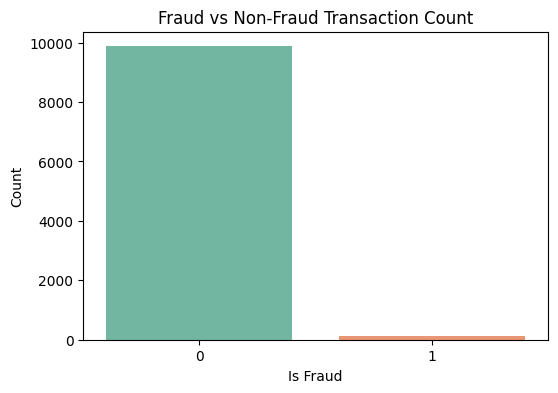

In [ ]:
#step 4 - EDA
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='Set2')
plt.title("Fraud vs Non-Fraud Transaction Count")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

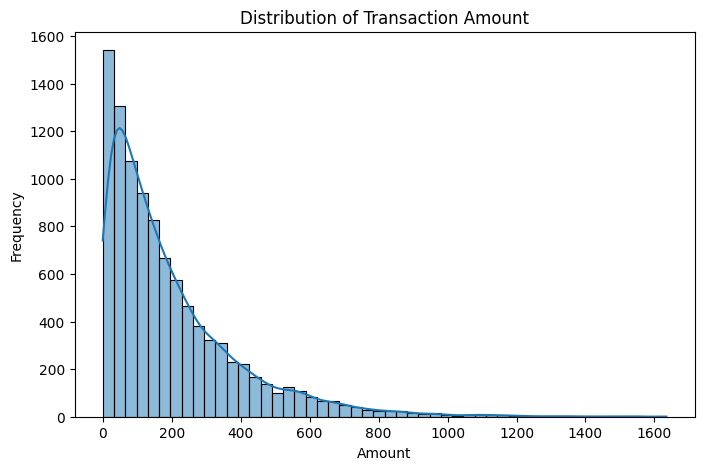

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

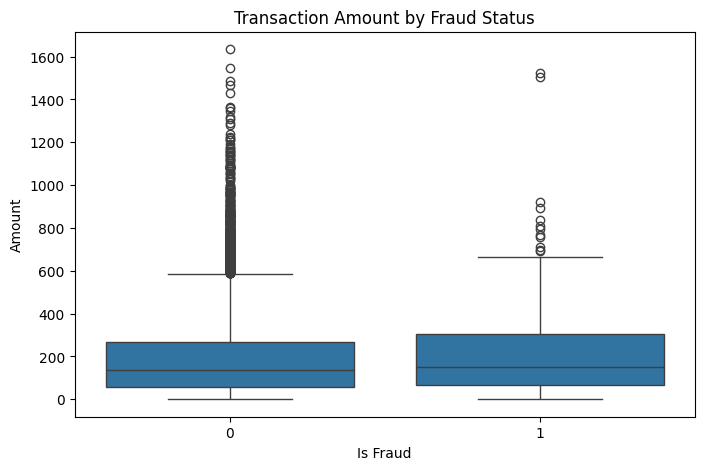

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fraud', y='amount', data=df)
plt.title("Transaction Amount by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Amount")
plt.show()

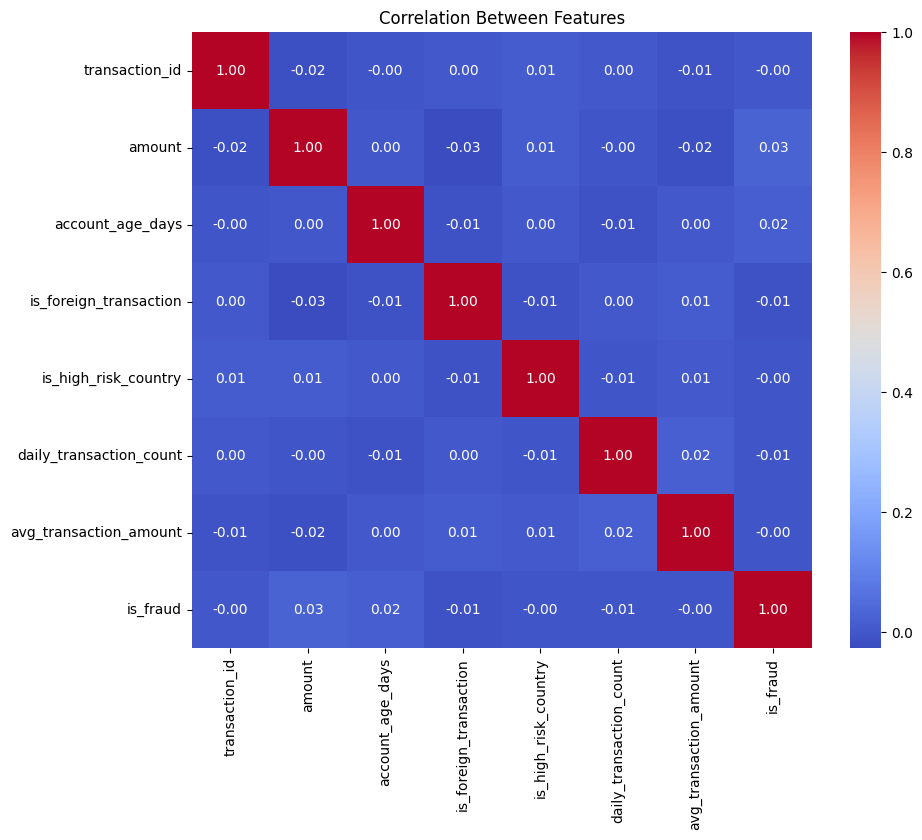

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Features")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\nRandom Forest Report:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1974
           1       0.00      0.00      0.00        26

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.97      0.99      0.98      2000

Accuracy: 0.9865


In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, log_preds))
print("Accuracy:", accuracy_score(y_test, log_preds))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1974
           1       0.00      0.00      0.00        26

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.97      0.99      0.98      2000

Accuracy: 0.987


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


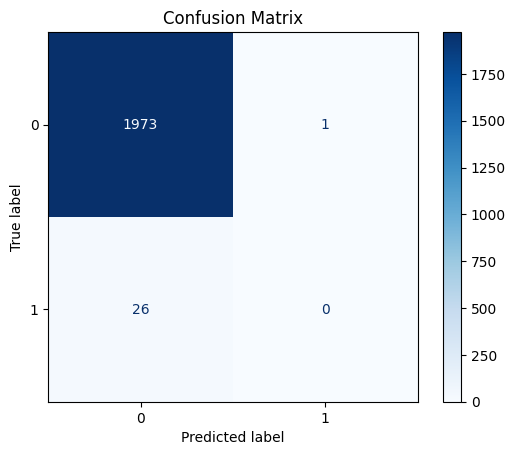

In [ ]:
#step 6 - confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, rf_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


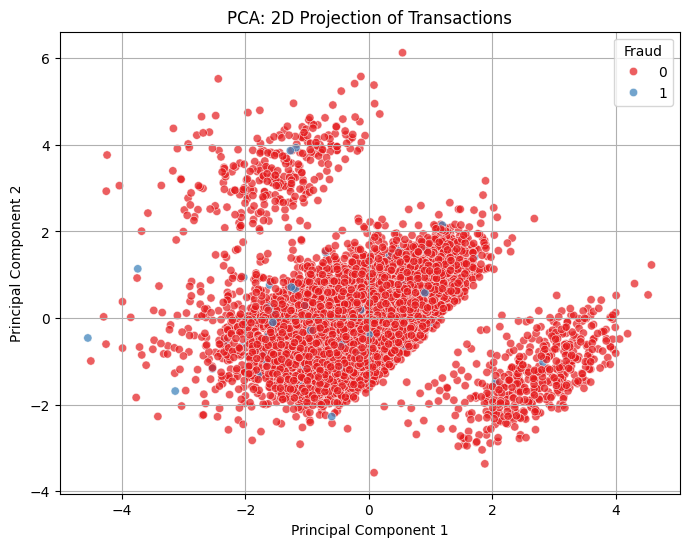

[0.17443954 0.16865476]


In [ ]:
#step 7
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", alpha=0.7)
plt.title("PCA: 2D Projection of Transactions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Fraud")
plt.grid(True)
plt.show()

print(pca.explained_variance_ratio_)


In [ ]:
# step 8 --
from sklearn.linear_model import LogisticRegression

log_l2 = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
log_l2.fit(X_train, y_train)
l2_preds = log_l2.predict(X_test)

log_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)
log_l1.fit(X_train, y_train)
l1_preds = log_l1.predict(X_test)


from sklearn.metrics import classification_report
print("L2 Regularization Performance:")
print(classification_report(y_test, l2_preds))

print("\nL1 Regularization Performance:")
print(classification_report(y_test, l1_preds))


L2 Regularization Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1974
           1       0.00      0.00      0.00        26

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.97      0.99      0.98      2000


L1 Regularization Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1974
           1       0.00      0.00      0.00        26

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.97      0.99      0.98      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
#step 9
print("Slope/Weights (m):", log_model.coef_)
print("Intercept (b):", log_model.intercept_)


Slope/Weights (m): [[ 7.77875810e-04  1.11141976e-04 -3.90637252e-01 -1.09987784e-01
  -8.54797425e-02  1.68275984e-04]]
Intercept (b): [-4.4767834]


In [ ]:
# step 10 - xgboost
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "reg:squarederror",
    "max_depth": 4,
    "eta": 0.1,
    "seed": 42
}
model = xgb.train(params, dtrain, num_boost_round=100)

predictions = model.predict(dtest)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions) ** 0.5
r2 = r2_score(y_test, predictions)

print("📊 Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


📊 Evaluation Metrics:
Mean Absolute Error (MAE): 0.3467596921638879
Mean Squared Error (MSE): 0.26275762775016454
Root Mean Squared Error (RMSE): 0.5125988955803207
R² Score: 0.7994842586450439


<ipython-input-36-f2425ee8d396>:54: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


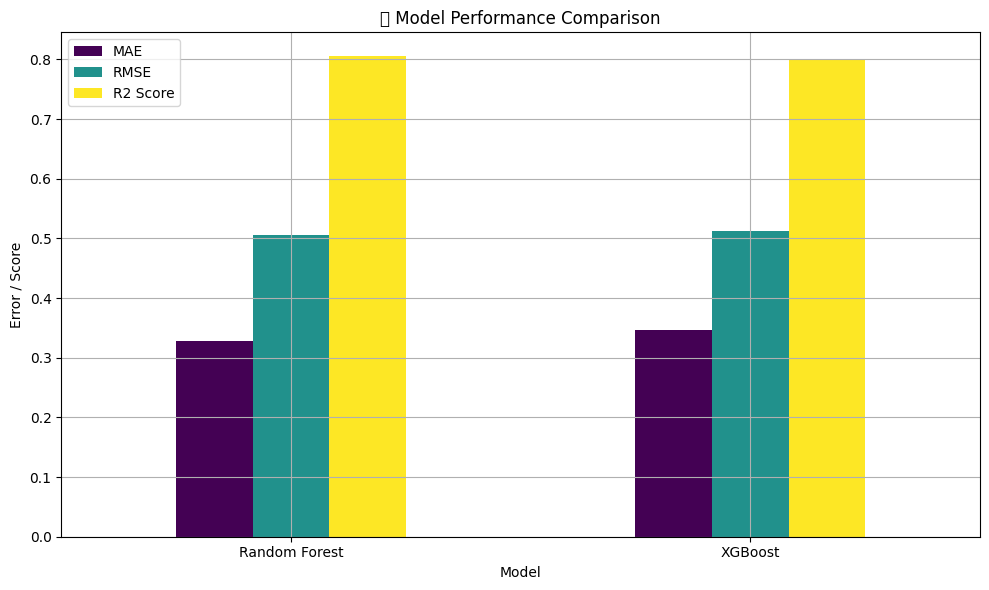

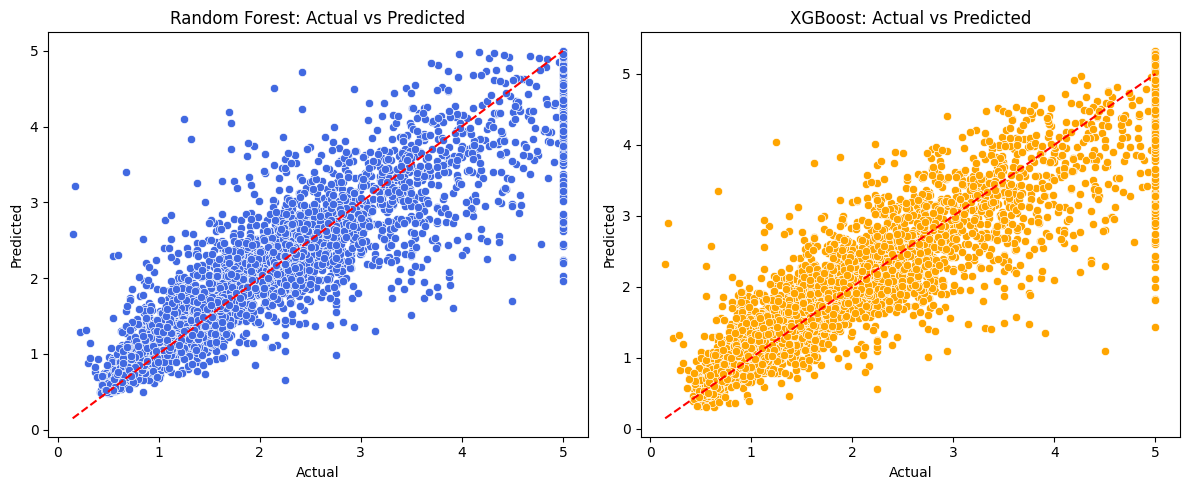

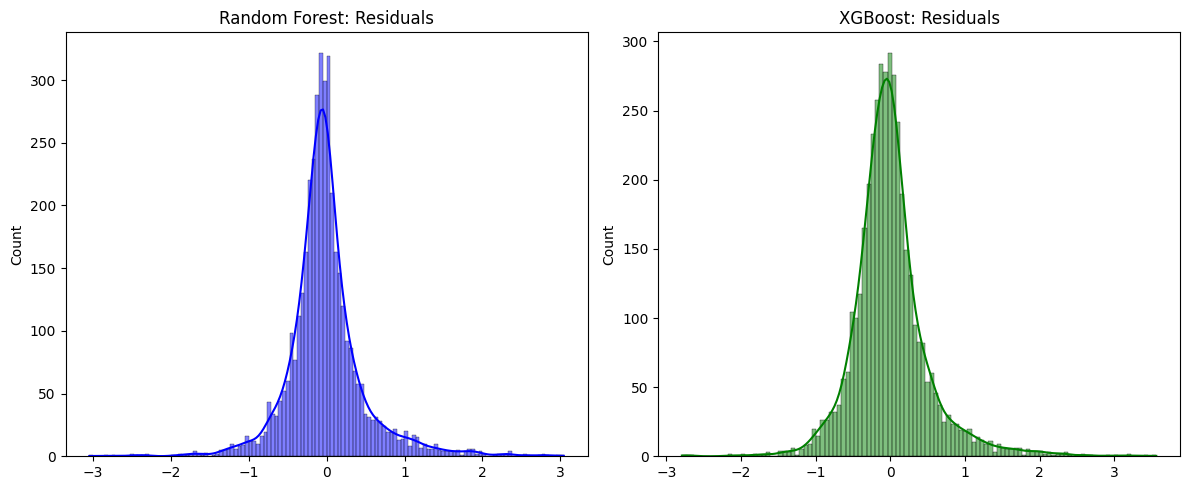

In [36]:

import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {"objective": "reg:squarederror", "max_depth": 4, "eta": 0.1, "seed": 42}
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
xgb_preds = xgb_model.predict(dtest)

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

rf_mae, rf_rmse, rf_r2 = evaluate(y_test, rf_preds)
xgb_mae, xgb_rmse, xgb_r2 = evaluate(y_test, xgb_preds)

metrics_df = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "MAE": [rf_mae, xgb_mae],
    "RMSE": [rf_rmse, xgb_rmse],
    "R2 Score": [rf_r2, xgb_r2]
})

metrics_df.set_index("Model").plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("📊 Model Performance Comparison")
plt.ylabel("Error / Score")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=rf_preds, color="royalblue")
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=xgb_preds, color="orange")
plt.title("XGBoost: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(y_test - rf_preds, kde=True, color="blue")
plt.title("Random Forest: Residuals")

plt.subplot(1, 2, 2)
sns.histplot(y_test - xgb_preds, kde=True, color="green")
plt.title("XGBoost: Residuals")

plt.tight_layout()
plt.show()


Final slope (m): -0.01767621873130781
Final intercept (b): 5.771738642579284e-17


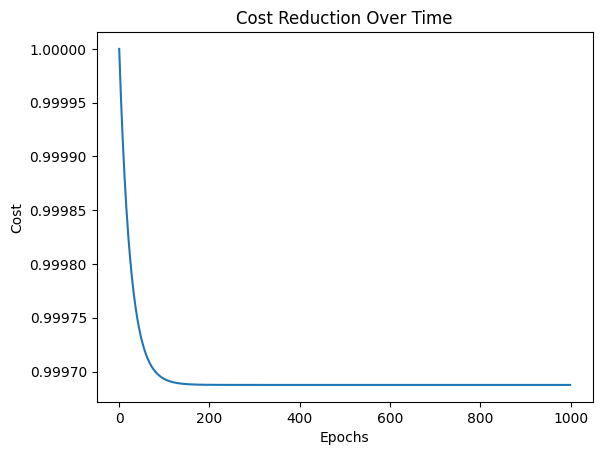

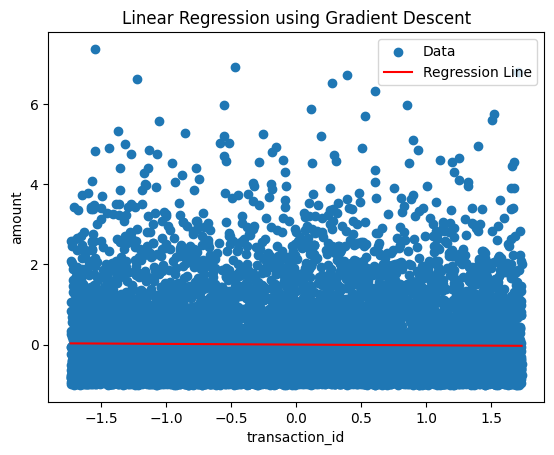

In [39]:
# step 12 - Gradient Descent
numerical_cols = df.select_dtypes(include=[np.number]).columns
x_col = numerical_cols[0]
y_col = numerical_cols[1]

X = df[x_col].values
y = df[y_col].values

X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

alpha = 0.01
epochs = 1000
m = 0
b = 0
n = len(X)

cost_history = []

for _ in range(epochs):
    y_pred = m * X + b
    error = y - y_pred
    cost = (error**2).mean()
    cost_history.append(cost)

    m_grad = -(2/n) * np.dot(X, error)
    b_grad = -(2/n) * error.sum()

    m -= alpha * m_grad
    b -= alpha * b_grad

print(f"Final slope (m): {m}")
print(f"Final intercept (b): {b}")

plt.plot(range(epochs), cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Time")
plt.show()

plt.scatter(X, y, label='Data')
plt.plot(X, m*X + b, color='red', label='Regression Line')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()


In [45]:
# step13 - Cross Validation (Using Logistic Regression)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

df_clean = df.select_dtypes(include=[np.number]).dropna()

X = df_clean.iloc[:, :-1].values
y = df_clean.iloc[:, -1].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-Validation Accuracy Scores: [0.9855 0.9875 0.989  0.9865 0.987 ]
Mean Accuracy: 0.9871000000000001
Standard Deviation: 0.0011575836902790063


Correlation Matrix:
                         transaction_id    amount  account_age_days  \
transaction_id                 1.000000 -0.017676         -0.004889   
amount                        -0.017676  1.000000          0.000701   
account_age_days              -0.004889  0.000701          1.000000   
is_foreign_transaction         0.003355 -0.026888         -0.013810   
is_high_risk_country           0.012102  0.009414          0.002234   
daily_transaction_count        0.002065 -0.004183         -0.013177   
avg_transaction_amount        -0.010150 -0.016870          0.003364   
is_fraud                      -0.002405  0.026979          0.016282   

                         is_foreign_transaction  is_high_risk_country  \
transaction_id                         0.003355              0.012102   
amount                                -0.026888              0.009414   
account_age_days                      -0.013810              0.002234   
is_foreign_transaction                 1.000000 

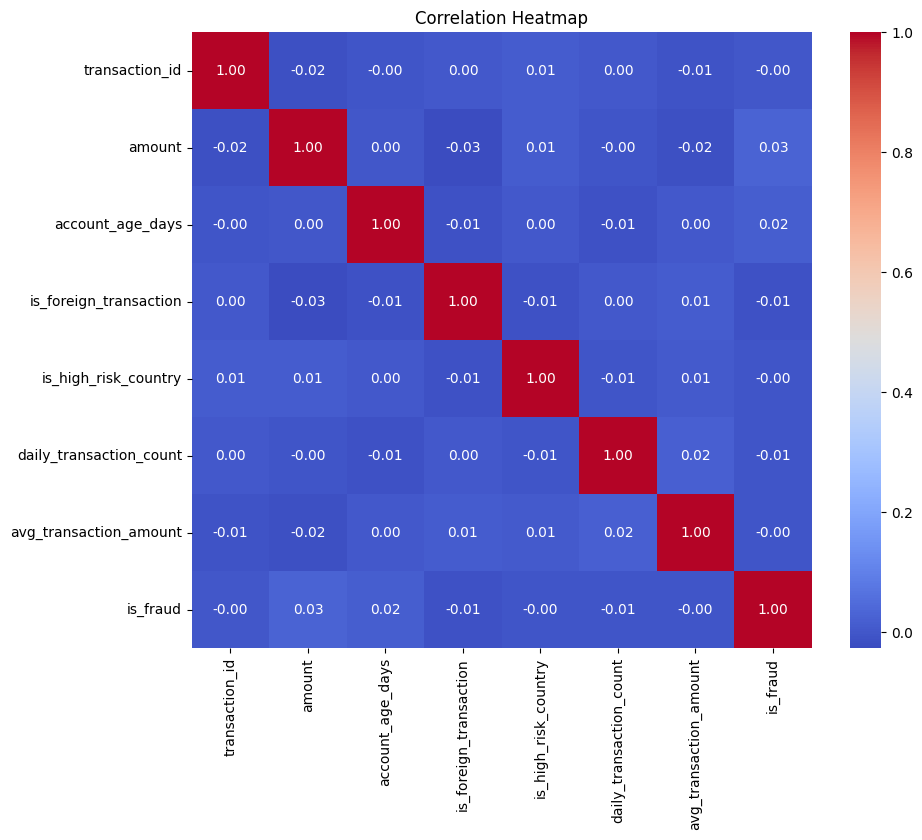

Covariance Matrix:
                         transaction_id        amount  account_age_days  \
transaction_id             8.334167e+06  -9944.656445     -1.480122e+04   
amount                    -9.944656e+03  37978.573803      1.432715e+02   
account_age_days          -1.480122e+04    143.271477      1.099954e+06   
is_foreign_transaction     2.086909e+00     -1.129003     -3.120583e+00   
is_high_risk_country       5.902190e+00      0.309925      3.958679e-01   
daily_transaction_count    1.037109e+01     -1.417935     -2.403803e+01   
avg_transaction_amount    -1.471496e+03   -165.104840      1.771830e+02   
is_fraud                  -7.835284e-01      0.593334      1.927040e+00   

                         is_foreign_transaction  is_high_risk_country  \
transaction_id                         2.086909              5.902190   
amount                                -1.129003              0.309925   
account_age_days                      -3.120583              0.395868   
is_foreign_tr

In [41]:
#step 14 - Correlation & Covariance
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

covariance_matrix = numeric_df.cov()
print("Covariance Matrix:")
print(covariance_matrix)


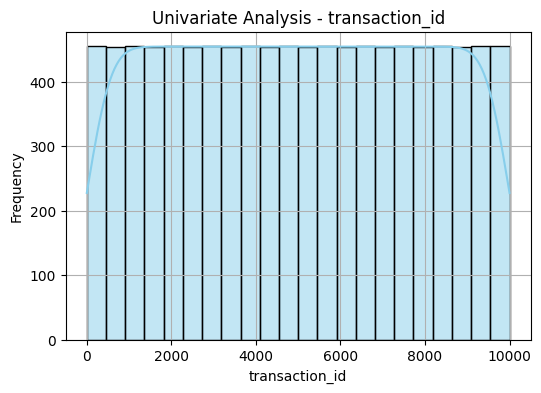

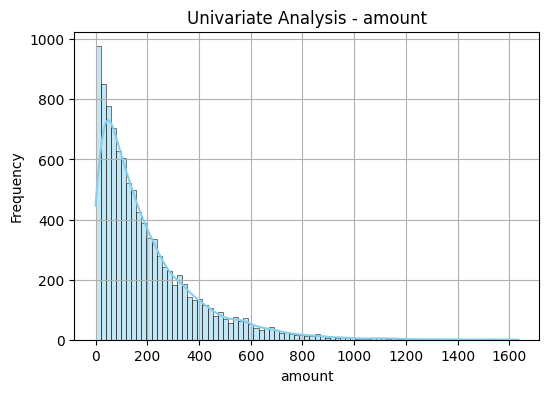

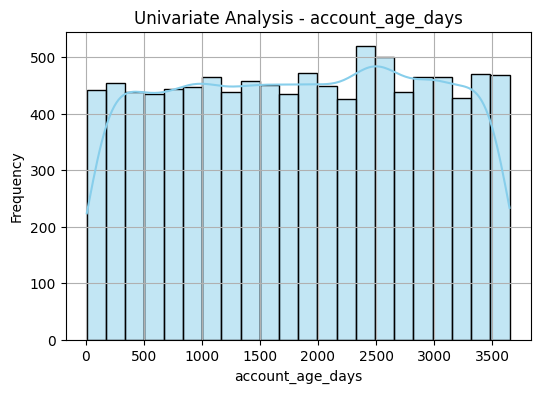

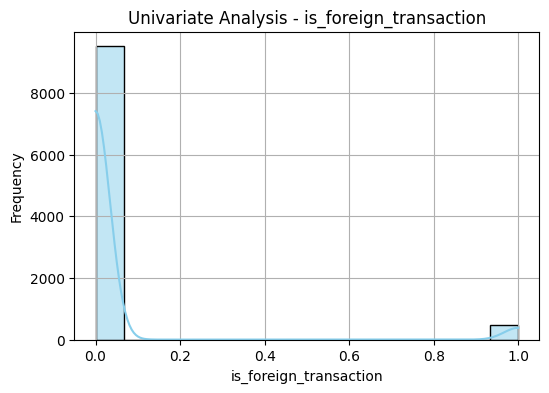

In [42]:
# univariate
numeric_cols = numeric_df.columns[:4]

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Univariate Analysis - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


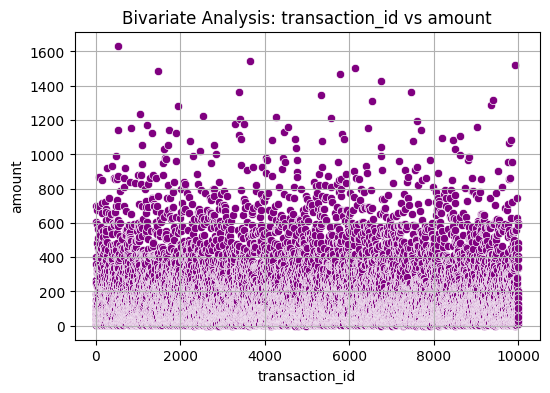

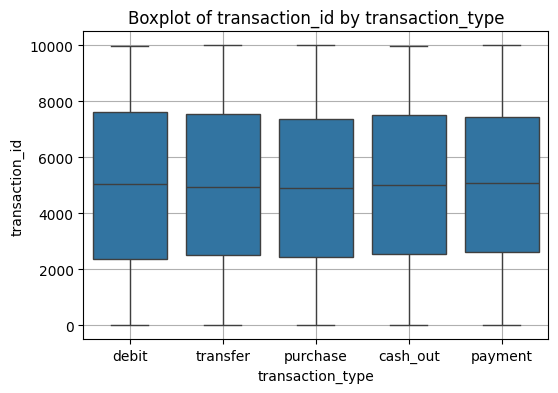

In [43]:
# bivariate
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x=numeric_cols[0], y=numeric_cols[1], color='purple')
plt.title(f'Bivariate Analysis: {numeric_cols[0]} vs {numeric_cols[1]}')
plt.grid(True)
plt.show()

categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=categorical_cols[0], y=numeric_cols[0])
    plt.title(f'Boxplot of {numeric_cols[0]} by {categorical_cols[0]}')
    plt.grid(True)
    plt.show()


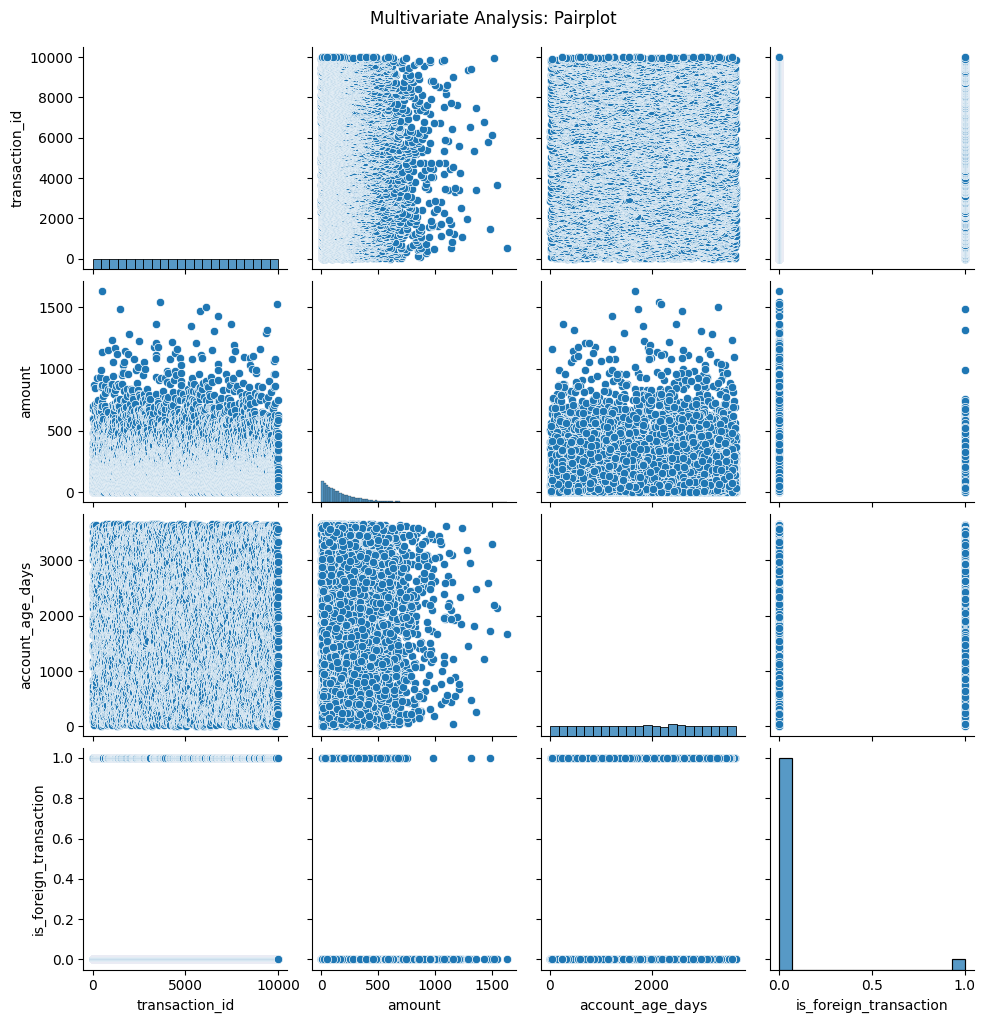

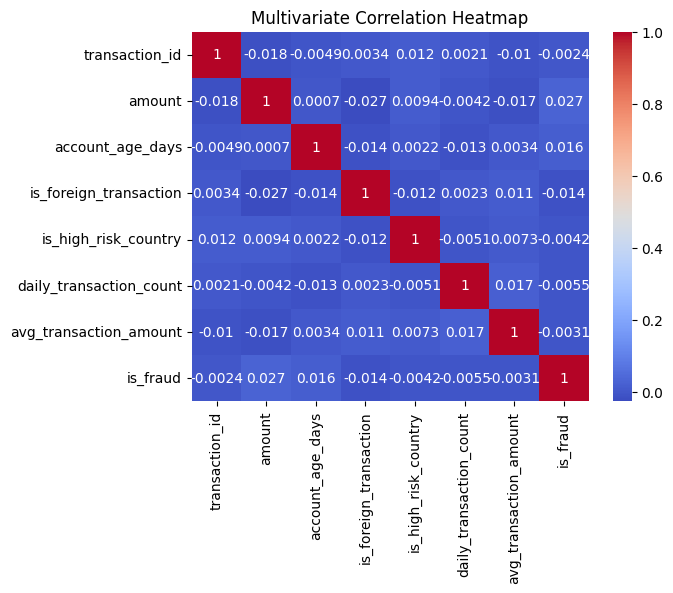

In [44]:
# multivariate
sns.pairplot(df[numeric_cols])
plt.suptitle('Multivariate Analysis: Pairplot', y=1.02)
plt.show()

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Multivariate Correlation Heatmap')
plt.show()
